<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-upload" data-toc-modified-id="Data-upload-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data upload</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Caclulating-FC-and-P-value" data-toc-modified-id="Caclulating-FC-and-P-value-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Caclulating FC and P-value</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Venn-Diagram" data-toc-modified-id="Venn-Diagram-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Venn Diagram</a></span></li><li><span><a href="#Volcano-plot" data-toc-modified-id="Volcano-plot-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Volcano plot</a></span></li><li><span><a href="#FoldChange-graph" data-toc-modified-id="FoldChange-graph-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>FoldChange graph</a></span></li><li><span><a href="#Variance-estimation" data-toc-modified-id="Variance-estimation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Variance estimation</a></span></li><li><span><a href="#Pathway-enrichment-analysis" data-toc-modified-id="Pathway-enrichment-analysis-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Pathway enrichment analysis</a></span><ul class="toc-item"><li><span><a href="#All-genes" data-toc-modified-id="All-genes-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>All genes</a></span></li><li><span><a href="#By-regions" data-toc-modified-id="By-regions-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>By regions</a></span></li></ul></li></ul></div>

Notion: https://www.notion.so/SHZ-and-MDD-research-989fdc493acd445086df6df71a427164

Source article : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6533277/

Geo Datasets: **GSE53987**

In [29]:
import GEOparse
from IPython.display import Image
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.multitest import multipletests

import os
import json

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.decomposition import PCA
import requests

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.stats import multitest

import qnorm

import gseapy 
from gseapy.plot import barplot, dotplot
from gseapy.plot import gseaplot

In [30]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


import scanpy as sc

In [31]:
import warnings
warnings.filterwarnings("ignore")

## Data Description 

Affymetrix microarrays were used to profile postmortem dorsolateral prefrontal cortex (DLPFC), hippocampus, and associative striatum from 19 well-matched tetrads of subjects with SCZ, MDD, or unaffected controls. 

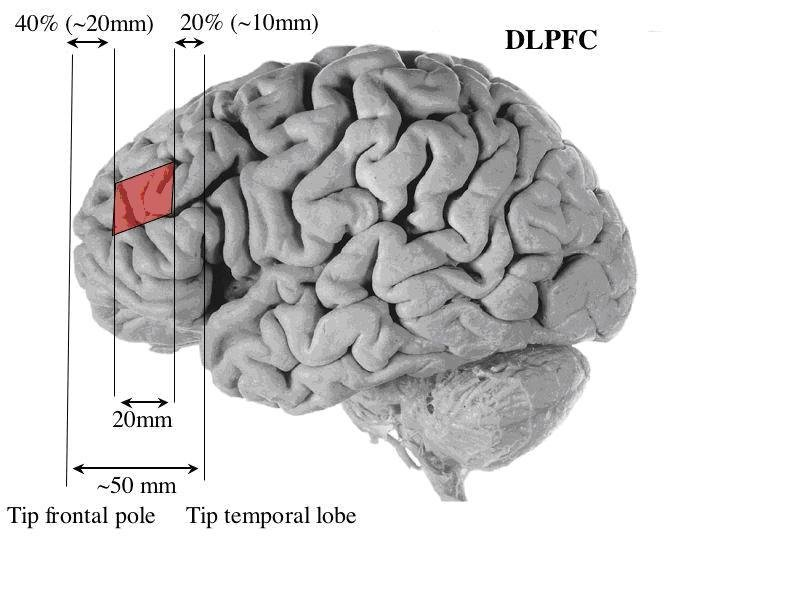

In [32]:
Image("DLPFC.jpg", width=330, height=250)

The **dorsolateral prefrontal cortex (DLPFC)** is an area in the prefrontal cortex of the brain.

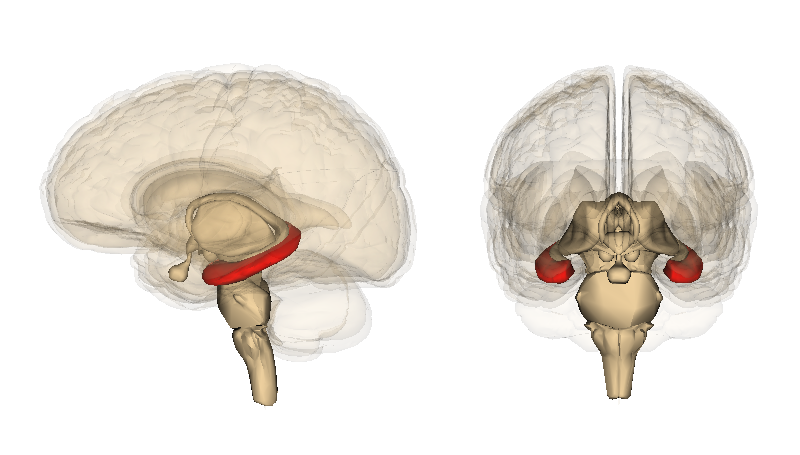

In [33]:
Image("Hippocampus.png", width=460, height=480)

The **hippocampus** is part of the limbic system, and plays important roles in the consolidation of information from short-term memory to long-term memory

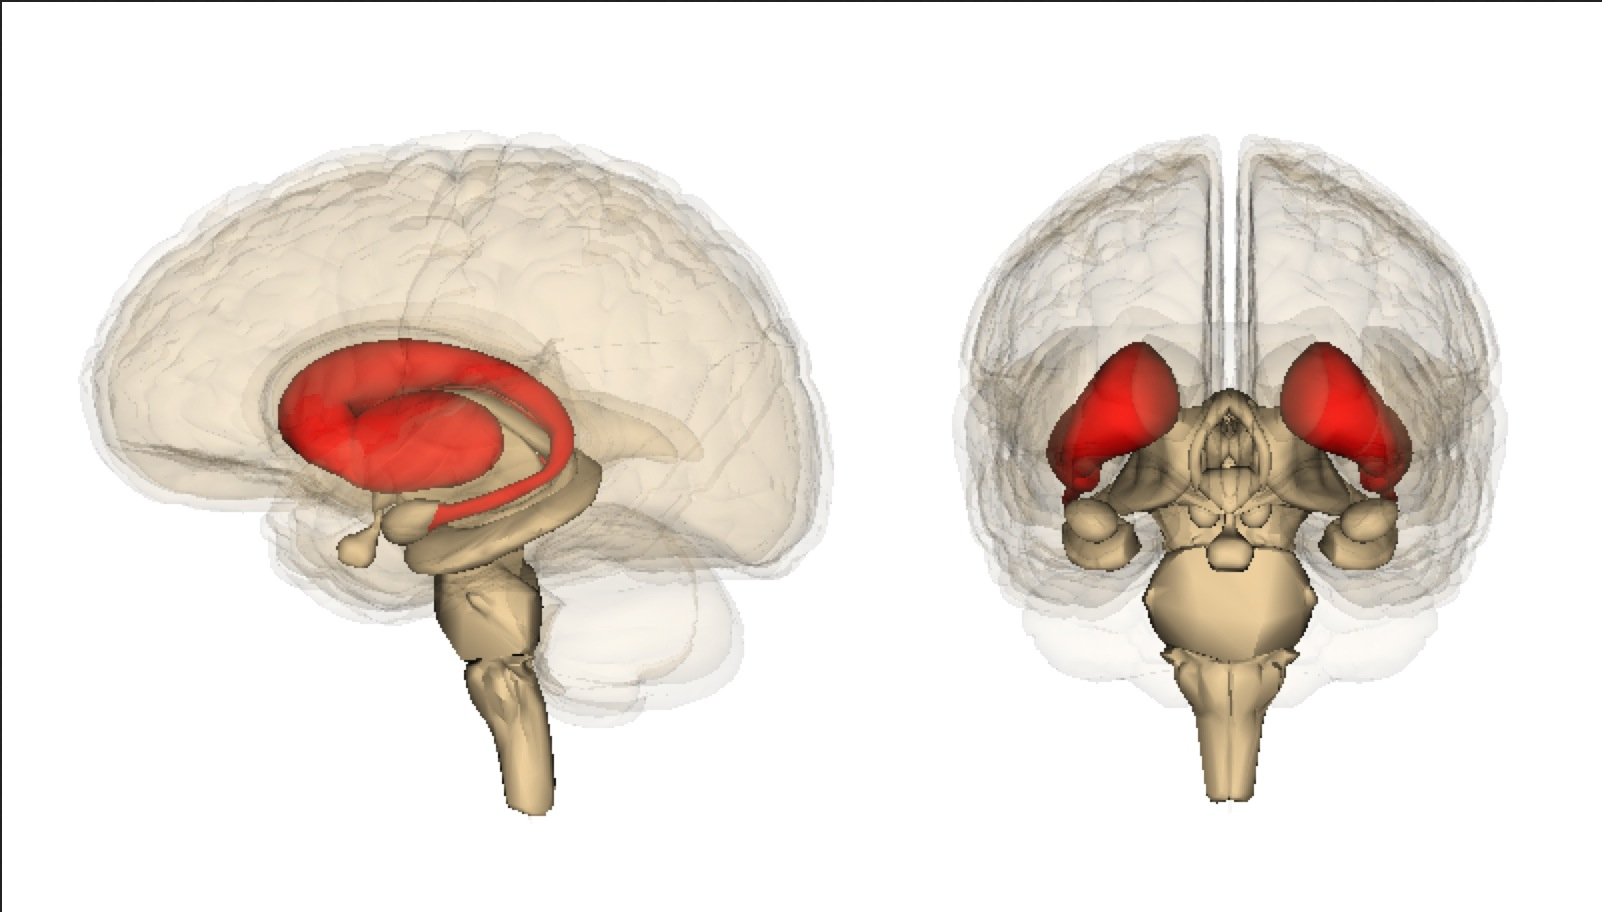

In [34]:
Image("Striatum.jpg", width=460, height=480)

The **striatum** is the largest structure of the basal ganglia

## Data upload 

In [35]:
geo_accession_id = "GSE53987"

In [36]:
# Raw data is available on GEO DataSets, let's load the data from this source

gse = GEOparse.get_GEO(filepath = r'/Users/renatapyatkova/Desktop/inf/GSE53987_family.soft')

02-May-2024 12:38:23 INFO GEOparse - Parsing /Users/renatapyatkova/Desktop/inf/GSE53987_family.soft: 
02-May-2024 12:38:23 DEBUG GEOparse - DATABASE: GeoMiame
02-May-2024 12:38:23 DEBUG GEOparse - SERIES: GSE53987
02-May-2024 12:38:23 DEBUG GEOparse - PLATFORM: GPL570
02-May-2024 12:38:25 DEBUG GEOparse - SAMPLE: GSM1304852
02-May-2024 12:38:25 DEBUG GEOparse - SAMPLE: GSM1304853
02-May-2024 12:38:25 DEBUG GEOparse - SAMPLE: GSM1304854
02-May-2024 12:38:25 DEBUG GEOparse - SAMPLE: GSM1304855
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304856
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304857
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304858
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304859
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304860
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304861
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304862
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: GSM1304863
02-May-2024 12:38:26 DEBUG GEOparse - SAMPLE: G

In [37]:
gse

<SERIES: GSE53987 - 205 SAMPLES, 1 d(s)>

In [38]:
for name, extra in gse.gsms.items():
    name = name.strip('\n')
    print('\t\t'+name+' transferred\n')
    gse.gsms[name].table.to_csv(name+'.txt', index = None, sep = '\t', mode = 'w')


		GSM1304852 transferred

		GSM1304853 transferred

		GSM1304854 transferred

		GSM1304855 transferred

		GSM1304856 transferred

		GSM1304857 transferred

		GSM1304858 transferred

		GSM1304859 transferred

		GSM1304860 transferred

		GSM1304861 transferred

		GSM1304862 transferred

		GSM1304863 transferred

		GSM1304864 transferred

		GSM1304865 transferred

		GSM1304866 transferred

		GSM1304867 transferred

		GSM1304868 transferred

		GSM1304869 transferred

		GSM1304870 transferred

		GSM1304871 transferred

		GSM1304872 transferred

		GSM1304873 transferred

		GSM1304874 transferred

		GSM1304875 transferred

		GSM1304876 transferred

		GSM1304877 transferred

		GSM1304878 transferred

		GSM1304879 transferred

		GSM1304880 transferred

		GSM1304881 transferred

		GSM1304882 transferred

		GSM1304883 transferred

		GSM1304884 transferred

		GSM1304885 transferred

		GSM1304886 transferred

		GSM1304887 transferred

		GSM1304888 transferred

		GSM1304889 transferred

		GSM1304890

In [39]:
dir(gse)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_metadata_as_string',
 '_get_object_as_soft',
 '_phenotype_data',
 'database',
 'download_SRA',
 'download_supplementary_files',
 'geotype',
 'get_accession',
 'get_metadata_attribute',
 'get_type',
 'gpls',
 'gsms',
 'merge_and_average',
 'metadata',
 'name',
 'phenotype_data',
 'pivot_and_annotate',
 'pivot_samples',
 'relations',
 'show_metadata',
 'to_soft']

In [40]:
gse.gsms['GSM1304870'].table

,ID_REF,VALUE
0,1007_s_at,1140.83
1,1053_at,63.75
2,117_at,21.04
3,121_at,189.56
4,1255_g_at,22.53
...,...,...
54670,AFFX-r2-Ec-bioC-5_at,1258.95
54671,AFFX-r2-Ec-bioD-3_at,9953.94
54672,AFFX-r2-Ec-bioD-5_at,7457.31
54673,AFFX-r2-P1-cre-3_at,21069.52


In [41]:
# Let's load the data about samples (information about disease, region and a patient)

samples = pd.read_excel('sample name.xlsx', header=0)
samples.head(5)


,Sample,Name
0,GSM1304852,bipolar_hip_10
1,GSM1304853,bipolar_hip_11
2,GSM1304854,bipolar_hip_12
3,GSM1304855,bipolar_hip_13
4,GSM1304856,bipolar_hip_14


In [42]:
# Let's put each data type in its own column and drop bipolar disease info

samples[['Disease', 'Region', 'Number']] = samples['Name'].str.split('_', expand=True)
samples = samples.drop('Name', axis=1)
samples = samples[samples['Disease'] != 'bipolar']
samples = samples.set_index('Sample')
samples

,Disease,Region,Number
Sample,,,
GSM1304870,control,hip,10
GSM1304871,control,hip,11
GSM1304872,control,hip,12
GSM1304873,control,hip,13
GSM1304874,control,hip,14
...,...,...,...
GSM1305052,schiz,str,14
GSM1305053,schiz,str,15
GSM1305054,schiz,str,16


In [43]:
# Split the dataset by the values of the "Region" column

regions = samples['Region'].unique()

for r in regions:
    globals()[f'data_{r}'] = samples[samples['Region'] == r]


In [44]:
data_hip.shape

(50, 3)

In [45]:
# Let's pivot the table according to samples names and genes id, 
# so that VALUE is in the intersection
# VALUE is a GE info

pivoted_samples = gse.pivot_samples('VALUE')[samples.index]
pivoted_samples

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1140.83,978.87,1074.57,1147.48,903.68,824.56,1152.50,1027.71,851.09,978.02,...,4223.55,3077.79,3229.73,3635.35,3604.07,3420.59,4102.63,2701.14,2586.70,3015.19
1053_at,63.75,74.99,72.34,71.72,73.61,68.21,63.69,48.77,69.06,71.32,...,213.87,181.82,224.74,118.16,223.98,218.83,135.41,251.16,225.75,257.30
117_at,21.04,21.78,18.78,25.40,24.52,21.32,21.41,22.44,19.28,19.58,...,96.07,111.09,94.19,175.36,96.94,93.47,100.70,80.95,104.29,185.04
121_at,189.56,178.24,144.28,192.70,172.72,197.59,211.13,190.15,249.97,198.81,...,586.32,671.01,708.31,758.99,664.14,719.59,708.69,641.29,481.93,577.66
1255_g_at,22.53,39.31,39.88,26.90,71.39,32.62,22.05,40.21,37.12,42.30,...,441.50,576.11,716.16,227.32,423.30,639.27,199.12,705.02,581.48,731.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,1258.95,1167.04,1090.42,952.27,1236.27,1127.46,877.37,1492.77,1248.26,1011.48,...,1698.97,1434.18,1427.55,1957.37,1585.77,1507.24,1479.90,1510.61,1992.42,1882.65
AFFX-r2-Ec-bioD-3_at,9953.94,9455.30,8541.84,8654.58,9534.37,9401.35,7634.24,10565.78,10297.51,8779.88,...,8663.01,8744.28,7773.25,10221.63,8556.98,8427.13,8895.69,8324.36,9703.75,9049.69
AFFX-r2-Ec-bioD-5_at,7457.31,6957.18,6138.31,6347.51,6827.19,7106.21,5529.91,7808.22,7889.92,6711.25,...,6176.37,5986.09,4957.68,7120.88,5639.75,5610.74,5900.08,5533.08,7008.07,6513.92


## Filtering

Some of the genes show very low expression among all the samples, so let's exclude them, they will not be useful for the study.

In [46]:
# Calculation of the median for each gene among samples

pivoted_samples_average = pivoted_samples.median(axis=1)

print("Number of probes before filtering: ", len(pivoted_samples_average))

Number of probes before filtering:  54675


In [47]:
pivoted_samples_average.head(5)

ID_REF
1007_s_at    1060.45
1053_at       125.74
117_at         21.92
121_at        221.75
1255_g_at      45.98
dtype: float64

In [48]:
# Сut off at 0.1 quantile 

expression_threshold = pivoted_samples_average.quantile(0.1)
expressed_probes = pivoted_samples_average[pivoted_samples_average >= expression_threshold].index.tolist()

print("number of probes above threshold: ", len(expressed_probes))

number of probes above threshold:  49219


In [49]:
exprsdata = gse.pivot_samples("VALUE").loc[expressed_probes]
exprsdata = exprsdata.T
exprsdata = exprsdata[exprsdata.index.isin(samples.index)]#columns!!!



## Normalization 

Since each sample may differ from the other due to the specifics of the experiment, we need to normalize to exclude the influence of technical aspects on our data and leave only biological differences

In [50]:
exprsdata = exprsdata.T

In [51]:
exprsdata

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1140.83,978.87,1074.57,1147.48,903.68,824.56,1152.50,1027.71,851.09,978.02,...,4223.55,3077.79,3229.73,3635.35,3604.07,3420.59,4102.63,2701.14,2586.70,3015.19
1053_at,63.75,74.99,72.34,71.72,73.61,68.21,63.69,48.77,69.06,71.32,...,213.87,181.82,224.74,118.16,223.98,218.83,135.41,251.16,225.75,257.30
117_at,21.04,21.78,18.78,25.40,24.52,21.32,21.41,22.44,19.28,19.58,...,96.07,111.09,94.19,175.36,96.94,93.47,100.70,80.95,104.29,185.04
121_at,189.56,178.24,144.28,192.70,172.72,197.59,211.13,190.15,249.97,198.81,...,586.32,671.01,708.31,758.99,664.14,719.59,708.69,641.29,481.93,577.66
1255_g_at,22.53,39.31,39.88,26.90,71.39,32.62,22.05,40.21,37.12,42.30,...,441.50,576.11,716.16,227.32,423.30,639.27,199.12,705.02,581.48,731.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,1258.95,1167.04,1090.42,952.27,1236.27,1127.46,877.37,1492.77,1248.26,1011.48,...,1698.97,1434.18,1427.55,1957.37,1585.77,1507.24,1479.90,1510.61,1992.42,1882.65
AFFX-r2-Ec-bioD-3_at,9953.94,9455.30,8541.84,8654.58,9534.37,9401.35,7634.24,10565.78,10297.51,8779.88,...,8663.01,8744.28,7773.25,10221.63,8556.98,8427.13,8895.69,8324.36,9703.75,9049.69
AFFX-r2-Ec-bioD-5_at,7457.31,6957.18,6138.31,6347.51,6827.19,7106.21,5529.91,7808.22,7889.92,6711.25,...,6176.37,5986.09,4957.68,7120.88,5639.75,5610.74,5900.08,5533.08,7008.07,6513.92


In [53]:
means = exprsdata.mean()

# Data normalization: dividing each value by the average value of the corresponding column

exprsdata = exprsdata.div(means)
exprsdata

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.536121,4.839618,5.326501,5.577468,4.576429,3.982074,5.762165,5.427542,4.128832,4.752360,...,8.011979,6.197293,6.452745,7.934678,7.245700,6.813290,8.937853,5.178721,5.029808,5.496173
1053_at,0.309360,0.370757,0.358580,0.348604,0.372777,0.329409,0.318431,0.257564,0.335026,0.346556,...,0.405707,0.366104,0.449013,0.257901,0.450294,0.435876,0.295000,0.481533,0.438968,0.469014
117_at,0.102101,0.107682,0.093090,0.123460,0.124175,0.102961,0.107044,0.118510,0.093532,0.095142,...,0.182243,0.223686,0.188184,0.382749,0.194890,0.186178,0.219382,0.155200,0.202791,0.337296
121_at,0.919880,0.881234,0.715177,0.936642,0.874691,0.954228,1.055589,1.004220,1.212661,0.966050,...,1.112236,1.351114,1.415147,1.656606,1.335201,1.433313,1.543928,1.229504,0.937107,1.052975
1255_g_at,0.109332,0.194352,0.197680,0.130751,0.361534,0.157533,0.110244,0.212357,0.180078,0.205543,...,0.837516,1.160028,1.430831,0.496159,0.851011,1.273328,0.433796,1.351689,1.130681,1.333235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,6.109324,5.769947,5.405067,4.628626,6.260736,5.444878,4.386595,7.883617,6.055594,4.914947,...,3.222908,2.887797,2.852132,4.272244,3.188066,3.002191,3.224061,2.896195,3.874238,3.431747
AFFX-r2-Ec-bioD-3_at,48.303619,46.747824,42.340767,42.066652,48.284089,45.402236,38.168980,55.799999,49.955568,42.662879,...,16.433534,17.607070,15.530339,22.310189,17.203137,16.785550,19.379855,15.959757,18.868830,16.496029
AFFX-r2-Ec-bioD-5_at,36.188189,34.396902,30.426788,30.852854,34.574351,34.318244,27.647942,41.236772,38.275801,32.611066,...,11.716434,12.053309,9.905053,15.542353,11.338275,11.175733,12.853718,10.608216,13.627111,11.873756


In [54]:
#exprsdata = (exprsdata - exprsdata.mean()) / exprsdata.std()


In [55]:
#exprsdata = qnorm.quantile_normalize(exprsdata, axis=1) #standartize each sample (column)


https://pypi.org/project/qnorm/

## Caclulating FC and P-value

In [56]:
# Let's separate datasets according to region and disease

diseases = ['control', 'schiz', 'MDD']
regions = ['hip', 'pfc', 'str']
subtables = {}

for disease in diseases:
    for region in regions:
        selected_samples = samples[(samples['Disease'] == disease) & (samples['Region'] == region)].index
        subtables[f'{disease}_{region}'] = exprsdata[selected_samples]


In [57]:
subtables['MDD_hip'].head() #for example

name,GSM1304888,GSM1304889,GSM1304890,GSM1304891,GSM1304892,GSM1304893,GSM1304894,GSM1304895,GSM1304896,GSM1304897,GSM1304898,GSM1304899,GSM1304900,GSM1304901,GSM1304902,GSM1304903,GSM1304904
ID_REF,,,,,,,,,,,,,,,,,
1007_s_at,4.371549,4.404347,4.523127,5.440389,4.988351,3.927896,5.850484,4.786976,4.560054,4.863541,11.001031,5.145518,5.727851,5.124967,4.322785,7.936251,2.504794
1053_at,0.299185,0.349147,0.406881,0.291770,0.390402,0.398285,0.270544,0.364561,0.351264,0.347244,0.274430,0.299724,0.378240,0.297994,0.322579,0.292973,0.334216
117_at,0.111832,0.096594,0.094631,0.110736,0.099173,0.118809,0.107811,0.095227,0.094238,0.097533,0.124662,0.105349,0.120492,0.091505,0.102608,0.107332,0.102684
121_at,0.848292,0.927816,1.112745,0.876424,0.912373,0.830721,1.072310,1.177439,0.889154,0.977797,1.010768,1.003028,1.181454,0.787760,0.732332,1.166324,0.814855
1255_g_at,0.235217,0.296730,0.201542,0.250927,0.195036,0.268258,0.211705,0.340515,0.231484,0.204552,0.096954,0.165513,0.237581,0.209984,0.226427,0.186105,0.155359


In [58]:
# A function for calculation p-value and fc

def calculate (region, condition_1, condition_2): 
    #condition1 - disease, condition2 - control
    
    expr_condition_1 = subtables[f'{condition_1}_{region}']
    expr_condition_2 = subtables[f'{condition_2}_{region}']

    # mean value for each disease
    mean_expr_condition_1 = expr_condition_1.mean(axis=1)
    mean_expr_condition_2 = expr_condition_2.mean(axis=1)

    fold_change = mean_expr_condition_1 / mean_expr_condition_2
    log2fold_change = np.log2(fold_change)

    t_statistic, p_value = ttest_ind(expr_condition_1.T, expr_condition_2.T, equal_var=False)

    # multitest correction
    _, corrected_p_values, _, _ = multipletests(p_value, method='fdr_bh') # Benjamini/Hochberg


    result_df = pd.DataFrame({
        'Fold Change': fold_change,
        'pvalue': p_value,
        'padj': corrected_p_values,
        'log2FoldChange': log2fold_change
    })


    return result_df
    

In [59]:
calculate('hip' ,'schiz' , 'control') #for example

,Fold Change,pvalue,padj,log2FoldChange
ID_REF,,,,
1007_s_at,1.172997,0.061433,0.176557,0.230200
1053_at,0.868717,0.007058,0.061362,-0.203042
117_at,2.046662,0.146353,0.291715,1.033273
121_at,1.062693,0.217593,0.371542,0.087725
1255_g_at,1.042314,0.725786,0.814521,0.059790
...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,1.116665,0.166265,0.314341,0.159197
AFFX-r2-Ec-bioD-3_at,1.086787,0.110998,0.247687,0.120069
AFFX-r2-Ec-bioD-5_at,1.109302,0.083927,0.210382,0.149652


In [60]:
diseases = ['control', 'schiz', 'MDD']
regions = ['hip', 'pfc', 'str']

#Creation of dataframes for each disease and region

results = {}
for disease_1 in diseases:
    for disease_2 in diseases:
        for region in regions:
            if disease_1 != disease_2:
                df_name = f'{region}_{disease_1}_{disease_2}'
                df_value = calculate(region, disease_1, disease_2)
                results[df_name] = df_value


for df_name, df_value in results.items():
    print(f'DataFrame "{df_name}" is created')

DataFrame "hip_control_schiz" is created
DataFrame "pfc_control_schiz" is created
DataFrame "str_control_schiz" is created
DataFrame "hip_control_MDD" is created
DataFrame "pfc_control_MDD" is created
DataFrame "str_control_MDD" is created
DataFrame "hip_schiz_control" is created
DataFrame "pfc_schiz_control" is created
DataFrame "str_schiz_control" is created
DataFrame "hip_schiz_MDD" is created
DataFrame "pfc_schiz_MDD" is created
DataFrame "str_schiz_MDD" is created
DataFrame "hip_MDD_control" is created
DataFrame "pfc_MDD_control" is created
DataFrame "str_MDD_control" is created
DataFrame "hip_MDD_schiz" is created
DataFrame "pfc_MDD_schiz" is created
DataFrame "str_MDD_schiz" is created


In [61]:
results['pfc_schiz_control'] #for example

,Fold Change,pvalue,padj,log2FoldChange
ID_REF,,,,
1007_s_at,1.195456,0.000623,0.107771,0.257561
1053_at,0.950177,0.223046,0.650752,-0.073732
117_at,1.432603,0.127584,0.537528,0.518639
121_at,1.009828,0.834271,0.955803,0.014109
1255_g_at,0.929482,0.461796,0.811219,-0.105500
...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,0.914968,0.067088,0.431072,-0.128207
AFFX-r2-Ec-bioD-3_at,0.965794,0.251034,0.678061,-0.050213
AFFX-r2-Ec-bioD-5_at,0.973472,0.426411,0.792243,-0.038789


## PCA


In [62]:
exprsdata

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.536121,4.839618,5.326501,5.577468,4.576429,3.982074,5.762165,5.427542,4.128832,4.752360,...,8.011979,6.197293,6.452745,7.934678,7.245700,6.813290,8.937853,5.178721,5.029808,5.496173
1053_at,0.309360,0.370757,0.358580,0.348604,0.372777,0.329409,0.318431,0.257564,0.335026,0.346556,...,0.405707,0.366104,0.449013,0.257901,0.450294,0.435876,0.295000,0.481533,0.438968,0.469014
117_at,0.102101,0.107682,0.093090,0.123460,0.124175,0.102961,0.107044,0.118510,0.093532,0.095142,...,0.182243,0.223686,0.188184,0.382749,0.194890,0.186178,0.219382,0.155200,0.202791,0.337296
121_at,0.919880,0.881234,0.715177,0.936642,0.874691,0.954228,1.055589,1.004220,1.212661,0.966050,...,1.112236,1.351114,1.415147,1.656606,1.335201,1.433313,1.543928,1.229504,0.937107,1.052975
1255_g_at,0.109332,0.194352,0.197680,0.130751,0.361534,0.157533,0.110244,0.212357,0.180078,0.205543,...,0.837516,1.160028,1.430831,0.496159,0.851011,1.273328,0.433796,1.351689,1.130681,1.333235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,6.109324,5.769947,5.405067,4.628626,6.260736,5.444878,4.386595,7.883617,6.055594,4.914947,...,3.222908,2.887797,2.852132,4.272244,3.188066,3.002191,3.224061,2.896195,3.874238,3.431747
AFFX-r2-Ec-bioD-3_at,48.303619,46.747824,42.340767,42.066652,48.284089,45.402236,38.168980,55.799999,49.955568,42.662879,...,16.433534,17.607070,15.530339,22.310189,17.203137,16.785550,19.379855,15.959757,18.868830,16.496029
AFFX-r2-Ec-bioD-5_at,36.188189,34.396902,30.426788,30.852854,34.574351,34.318244,27.647942,41.236772,38.275801,32.611066,...,11.716434,12.053309,9.905053,15.542353,11.338275,11.175733,12.853718,10.608216,13.627111,11.873756


In [63]:
samples

,Disease,Region,Number
Sample,,,
GSM1304870,control,hip,10
GSM1304871,control,hip,11
GSM1304872,control,hip,12
GSM1304873,control,hip,13
GSM1304874,control,hip,14
...,...,...,...
GSM1305052,schiz,str,14
GSM1305053,schiz,str,15
GSM1305054,schiz,str,16


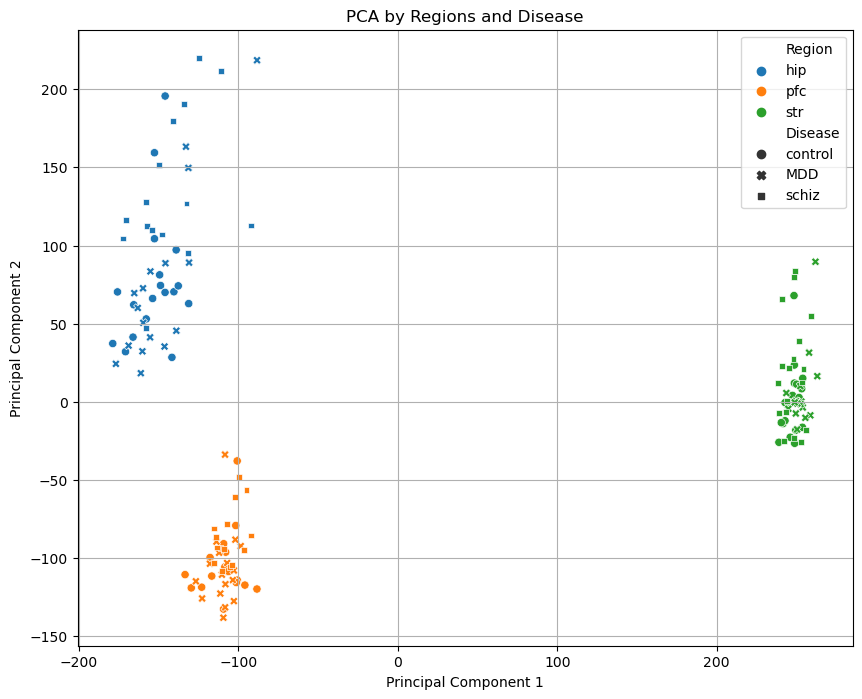

In [64]:
data_pca = exprsdata.T

# merge expression data and samples info
merged_data = data_pca.join(samples)

# need only data about expression, 3 last columns are Patient, Region, Disease
X = merged_data.iloc[:, :-3]  

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Region'] = merged_data['Region'].reset_index(drop=True)
pca_df['Disease'] = merged_data['Disease'].reset_index(drop=True)


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Region', style='Disease', data=pca_df)
plt.title('PCA by Regions and Disease')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

There is clear separation of samples by regions. Each of them formed a separate cluster on the graph.

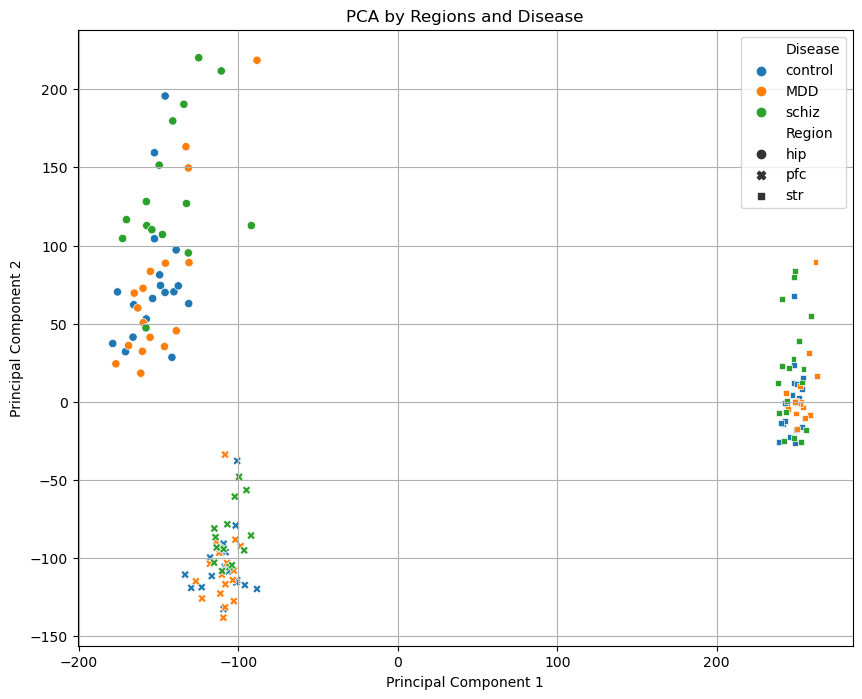

In [65]:
#just to look at

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Disease', style='Region', data=pca_df)
plt.title('PCA by Regions and Disease')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

To apply PCA and plot it, we use the table dictionary "subtables" that we calculated earlier. It contains GE data divided by region and disease.

Each graph will show how diseases and control relate within one region of the brain

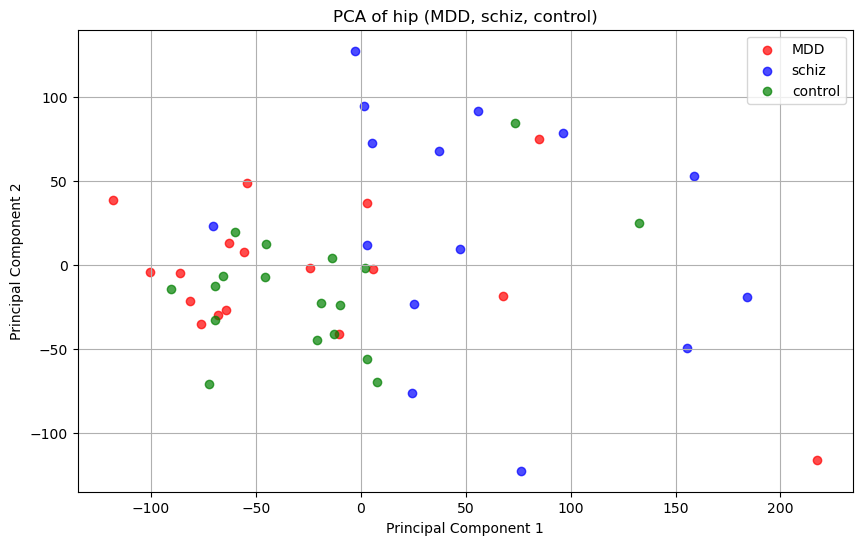

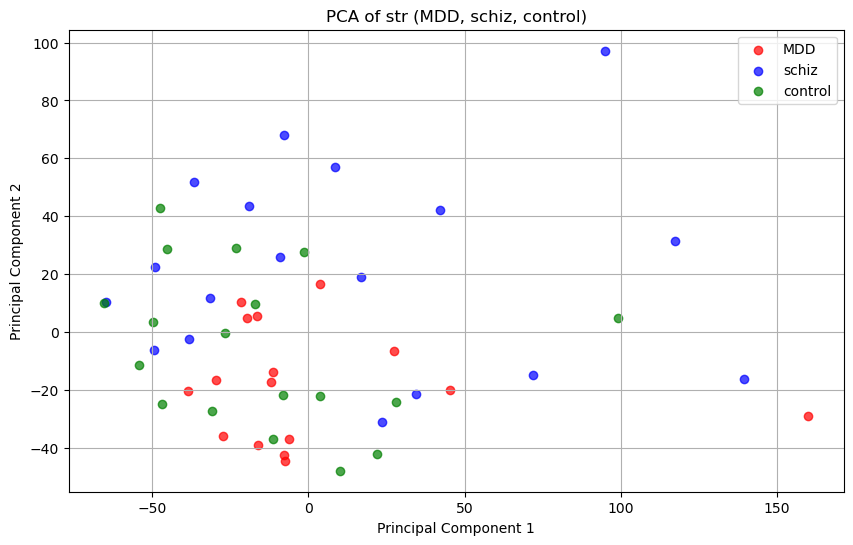

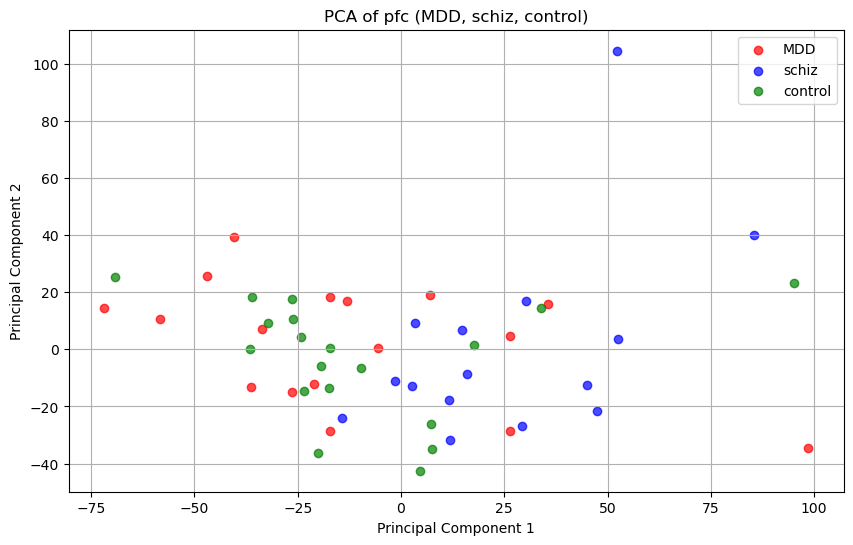

In [66]:
def plot_pca(subtables, region):
    
    # Filtering DataFrame by region and creating a list of disease labels
    filtered_dfs = []
    diseases = []  
    for disease, df in subtables.items():
        if region in disease:
            # Transposing DataFrame so that rows represent samples and columns represent genes
            transposed_df = df.transpose()
            # Copying transposed DataFrame to avoid modifying the original df
            filtered_dfs.append(transposed_df)
            # Populating the list of disease labels
            disease_label = disease.split('_')[0]
            diseases.extend([disease_label] * len(transposed_df))
    
    # Combining filtered, transposed DataFrames into one based on the region
    combined_df = pd.concat(filtered_dfs, ignore_index=True)
    
    # Adding 'disease' column 
    combined_df['disease'] = diseases
    
    # Handling NaN: replacing NaN with 0
    combined_df.fillna(0, inplace=True)
    
    # Extracting features and labels
    features = combined_df.iloc[:, :-1]  # All columns except the last one, which is the disease label
    labels = combined_df['disease']  # Last column containing disease label
    
    # Performing PCA
    pca = PCA(n_components=2)#???
    features_pca = pca.fit_transform(features)
    
    # Visualizing PCA results with color separation for each disease
    plt.figure(figsize=(10, 6))
    colors = {'MDD': 'red', 'schiz': 'blue', 'control': 'green'}
    for disease, color in colors.items():
        idx = labels == disease #if disease corresponds to the value in labels, then in idx - True
        plt.scatter(features_pca[idx, 0], features_pca[idx, 1], alpha=0.7, c=color, label=disease)
    
    plt.title(f'PCA of {region} (MDD, schiz, control)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    #display(features_pca)

# Executing the function for each region
for region in ['hip', 'str', 'pfc']:
    plot_pca(subtables, region)


**Conclusions:** 

Separate areas of the graph were identified for the prefrontal cortex, where samples were
samples were collected for each of the diagnoses and the control group. Slightly less pronounced consolidation of samples was observed in the graph for the hippocampus, but a separation between healthy individuals, patients
separation could still be seen between healthy individuals, patients withschizophrenia and depression. An almost complete absence of the effect of separation by diagnosis
was seen in the striatum graph.

## Venn Diagram

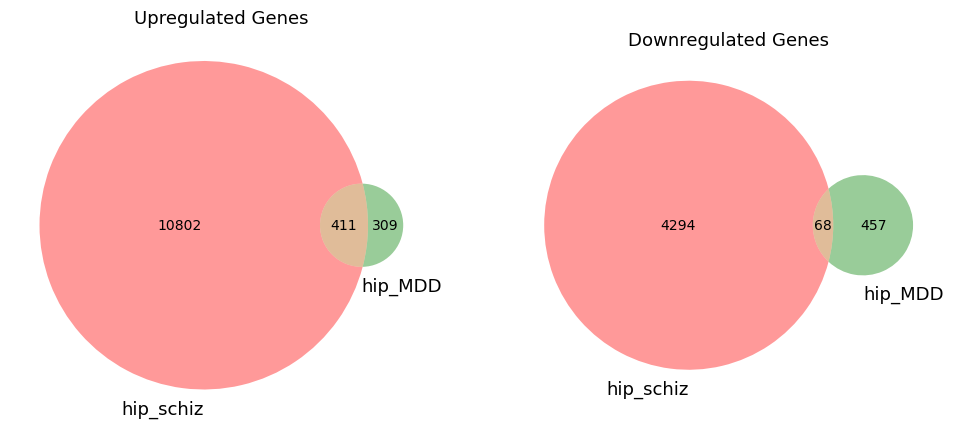

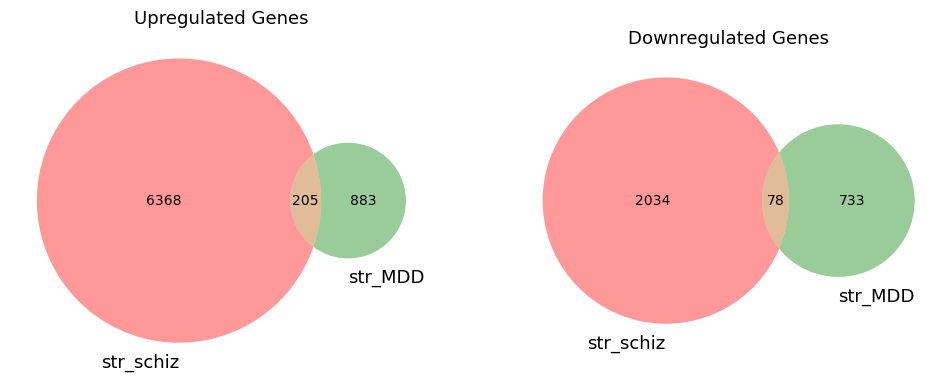

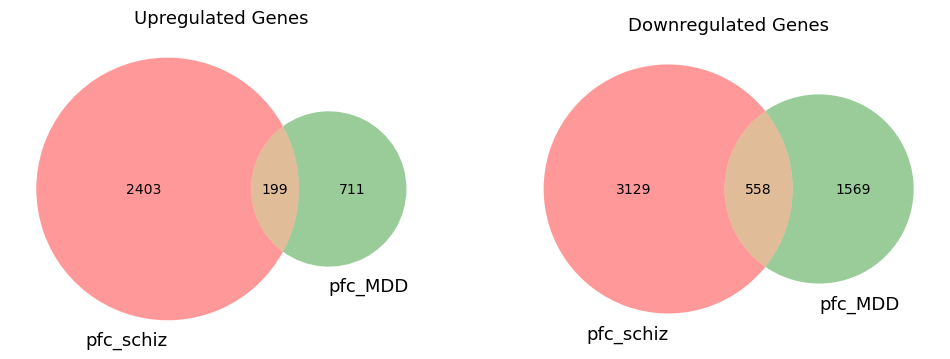

In [69]:
def plot_venn_up_down_regulated_genes(df1, df2, title1='Dataset 1', title2='Dataset 2'):
    
    # creating a set of indexes of genes to create an intersection later on
    # looking at values without pvalue correction for false discovery rate
    upregulated_df1 = set(df1[(df1['log2FoldChange'] > 0) & (df1['pvalue'] < 0.05)].index)
    downregulated_df1 = set(df1[(df1['log2FoldChange'] < 0) & (df1['pvalue'] < 0.05)].index)
    
    
    upregulated_df2 = set(df2[(df2['log2FoldChange'] > 0) & (df2['pvalue'] < 0.05)].index)
    downregulated_df2 = set(df2[(df2['log2FoldChange'] < 0) & (df2['pvalue'] < 0.05)].index)

    
    plt.figure(figsize=(12, 6))

    # upregulated 
    plt.subplot(1, 2, 1)
    venn = venn2([upregulated_df1, upregulated_df2], (title1, title2))
    plt.title('Upregulated Genes', fontsize = 13)
    
    for text in venn.set_labels:
        text.set_fontsize(13)

    # downregulated 
    plt.subplot(1, 2, 2)
    venn = venn2([downregulated_df1, downregulated_df2], (title1, title2))
    plt.title('Downregulated Genes', fontsize = 13)
    
    for text in venn.set_labels:
        text.set_fontsize(13)

    plt.show()
    

    
for region in ['hip', 'str', 'pfc']:
    plot_venn_up_down_regulated_genes(
        results[f'{region}_schiz_control'],
        results[f'{region}_MDD_control'],
        title1=f'{region}_schiz',
        title2=f'{region}_MDD'
    )


## Volcano plot


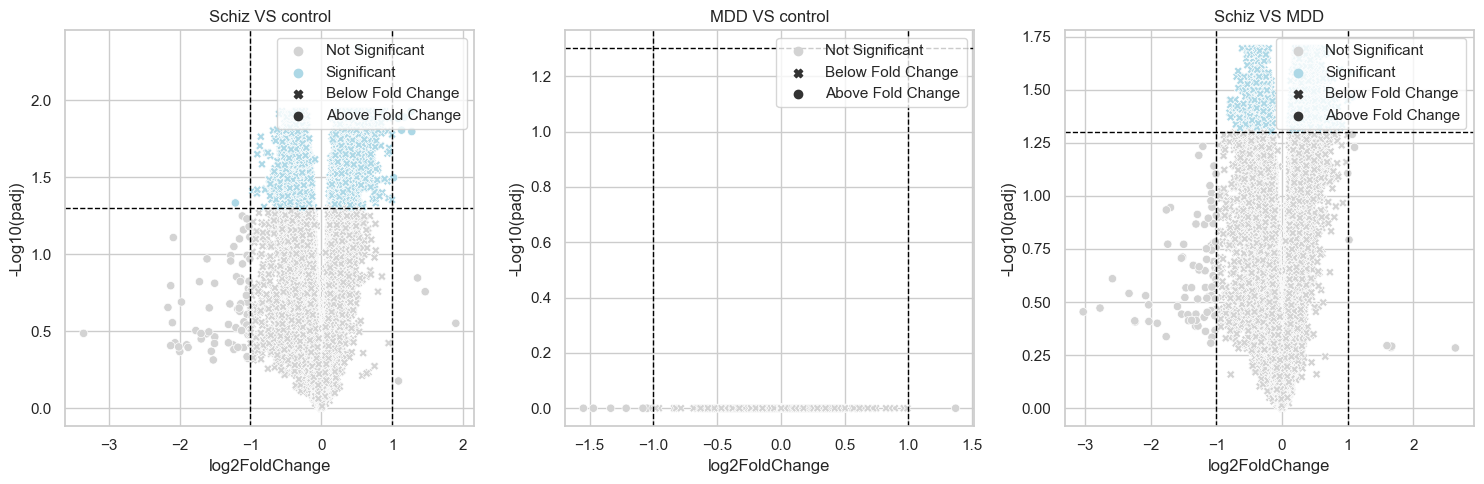

In [70]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

def plot_volcano(df, ax, title):
    #  -Log10(P-Value) calculation
    df['-Log10(padj)'] = -np.log10(df['padj'])
    sns.scatterplot(x='log2FoldChange', y='-Log10(padj)', data=df,
                    hue=np.where(df['padj'] < 0.05, "Significant", "Not Significant"),
                    style=np.where(abs(df['log2FoldChange']) > 1, "Above Fold Change", "Below Fold Change"),
                    palette={"Significant": "lightblue", "Not Significant": "lightgrey"},
                    markers={"Above Fold Change": "o", "Below Fold Change": "X"}, ax=ax)
    ax.set_title(title)
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', lw=1)
    ax.axvline(x=1, color='black', linestyle='--', lw=1)
    ax.axvline(x=-1, color='black', linestyle='--', lw=1)
    ax.legend(loc='upper right')

#HIP
for i, (df, title) in enumerate(zip([results['hip_control_schiz'], results['hip_control_MDD'], results['hip_MDD_schiz']], ['Schiz VS control', 'MDD VS control', 'Schiz VS MDD']), 1):
    # in "enumerate" table and name are stored under their own indexes
    ax = plt.subplot(1, 3, i)
    plot_volcano(df, ax, title)

plt.tight_layout()
plt.show()

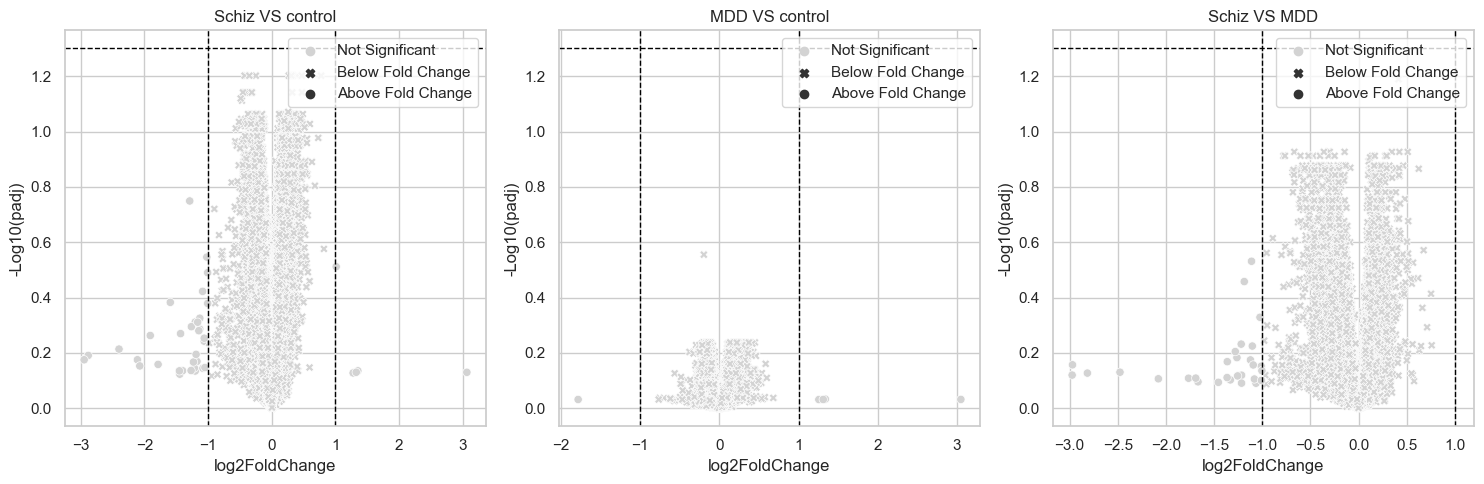

In [71]:
#PFC
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

for i, (df, title) in enumerate(zip([results['pfc_control_schiz'], results['pfc_control_MDD'], results['pfc_MDD_schiz']], ['Schiz VS control', 'MDD VS control', 'Schiz VS MDD']), 1):
    ax = plt.subplot(1, 3, i)
    plot_volcano(df, ax, title)

plt.tight_layout()
plt.show()

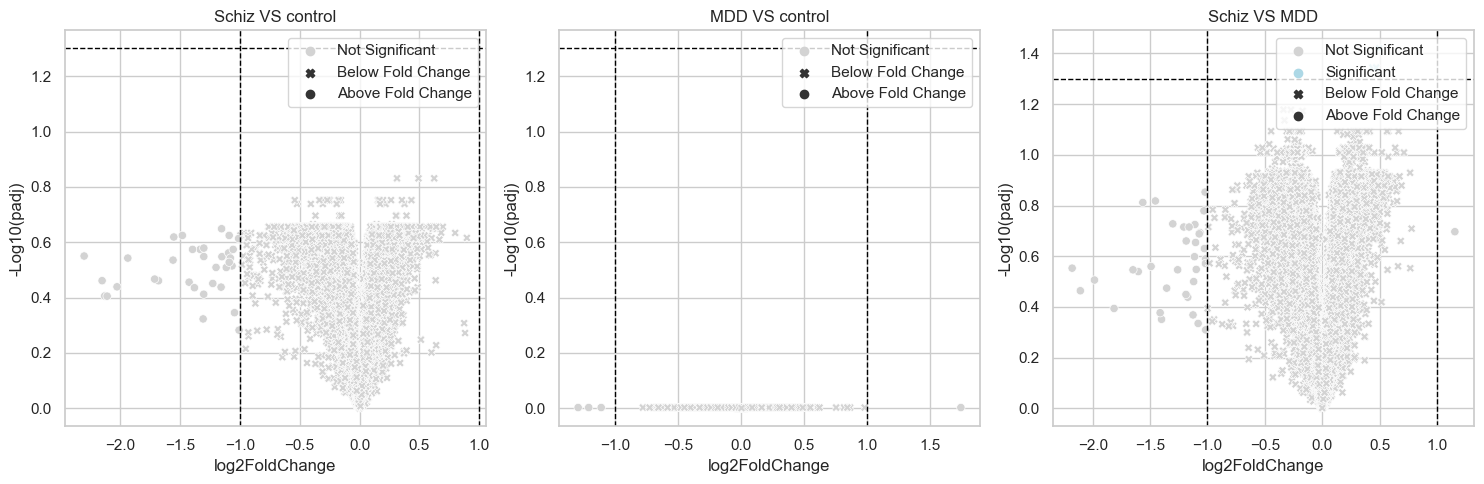

In [72]:
#STR
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

for i, (df, title) in enumerate(zip([results['str_control_schiz'], results['str_control_MDD'], results['str_MDD_schiz']], ['Schiz VS control', 'MDD VS control', 'Schiz VS MDD']), 1):
    ax = plt.subplot(1, 3, i)
    plot_volcano(df, ax, title)

plt.tight_layout()
plt.show()

## FoldChange graph

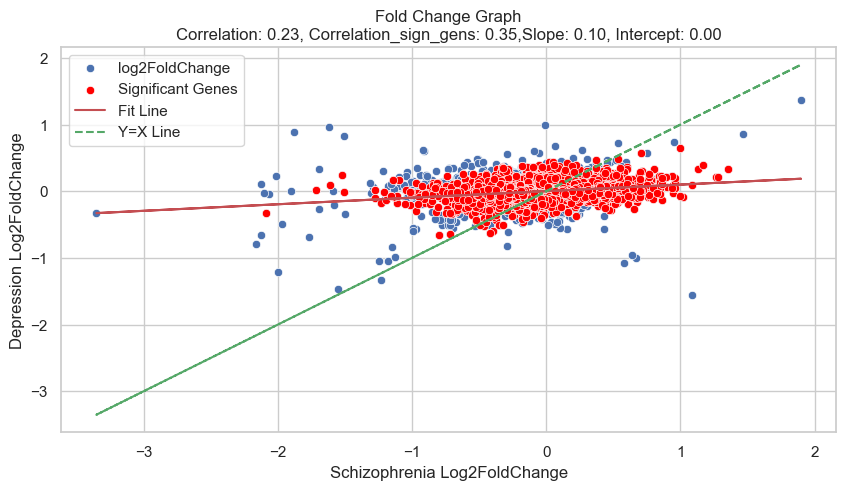

In [83]:
def fold_change_plot(df_schiz, df_mdd):
    significant_genes = (df_schiz.query('pvalue < 0.05').index).union(df_mdd.query('pvalue < 0.05').index)

    # Correlation coefficent
    correlation = np.corrcoef(df_schiz['log2FoldChange'], df_mdd['log2FoldChange'])[0, 1]
    correlation_sign = np.corrcoef(df_schiz[df_schiz.index.isin(significant_genes)].log2FoldChange, df_mdd[df_mdd.index.isin(significant_genes)].log2FoldChange)[0, 1]
    
    # Building linear regression for approximation
    slope, intercept, _, _, _ = stats.linregress(df_schiz['log2FoldChange'], df_mdd['log2FoldChange'])
     
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df_schiz['log2FoldChange'], y=df_mdd['log2FoldChange'], label='log2FoldChange')
    sns.scatterplot(x=df_schiz.loc[df_schiz.index.isin(significant_genes), 'log2FoldChange'],
                    y=df_mdd.loc[df_mdd.index.isin(significant_genes), 'log2FoldChange'],
                    label='Significant Genes', color='red')
    
    plt.plot(df_schiz['log2FoldChange'], intercept + slope * df_schiz['log2FoldChange'], 'r', label='Fit Line')
    plt.plot(df_schiz['log2FoldChange'], df_schiz['log2FoldChange'], 'g--', label='Y=X Line')
    
    plt.xlabel('Schizophrenia Log2FoldChange')
    plt.ylabel('Depression Log2FoldChange')
    plt.title(f'Fold Change Graph\nCorrelation: {correlation:.2f}, Correlation_sign_gens: {correlation_sign:.2f},Slope: {slope:.2f}, Intercept: {intercept:.2f}')
    plt.legend()
    plt.show()
    
    

#HIP
fold_change_plot (results['hip_control_schiz'], results['hip_control_MDD'])

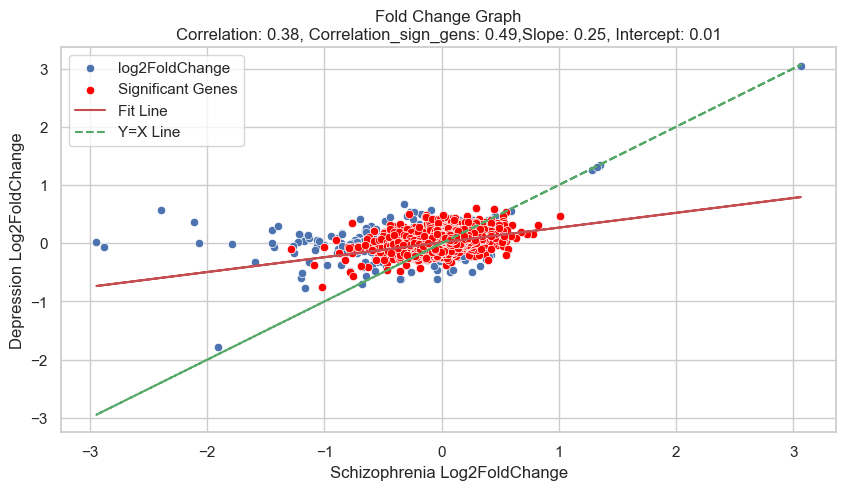

In [84]:
#PFC
fold_change_plot (results['pfc_control_schiz'], results['pfc_control_MDD'])

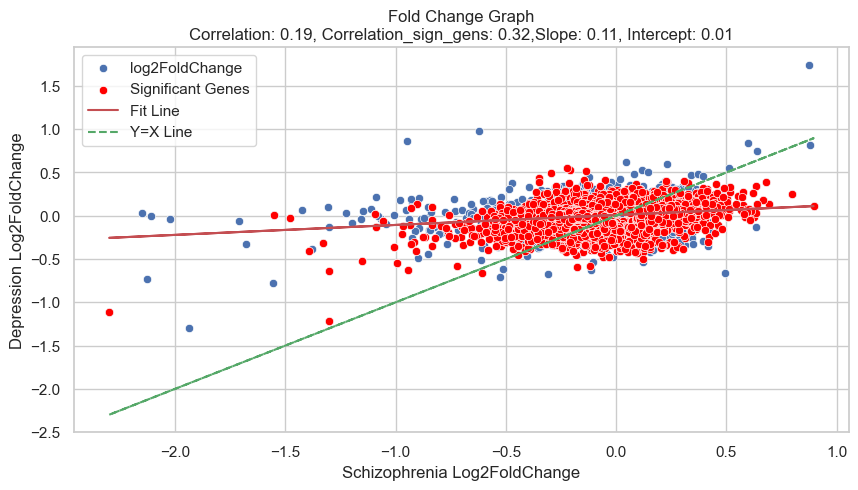

In [85]:
#STR
fold_change_plot (results['str_control_schiz'], results['str_control_MDD'])

**Conclusions:**

In [87]:
for r in regions:
    results[f'{r}_schiz_control'].to_excel(f'{r}_schiz_affymetrix.xlsx')
    results[f'{r}_MDD_control'].to_excel(f'{r}_MDD_affymetrix.xlsx')

## Variance estimation 

In [99]:
pivoted_samples

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1140.83,978.87,1074.57,1147.48,903.68,824.56,1152.50,1027.71,851.09,978.02,...,4223.55,3077.79,3229.73,3635.35,3604.07,3420.59,4102.63,2701.14,2586.70,3015.19
1053_at,63.75,74.99,72.34,71.72,73.61,68.21,63.69,48.77,69.06,71.32,...,213.87,181.82,224.74,118.16,223.98,218.83,135.41,251.16,225.75,257.30
117_at,21.04,21.78,18.78,25.40,24.52,21.32,21.41,22.44,19.28,19.58,...,96.07,111.09,94.19,175.36,96.94,93.47,100.70,80.95,104.29,185.04
121_at,189.56,178.24,144.28,192.70,172.72,197.59,211.13,190.15,249.97,198.81,...,586.32,671.01,708.31,758.99,664.14,719.59,708.69,641.29,481.93,577.66
1255_g_at,22.53,39.31,39.88,26.90,71.39,32.62,22.05,40.21,37.12,42.30,...,441.50,576.11,716.16,227.32,423.30,639.27,199.12,705.02,581.48,731.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,1258.95,1167.04,1090.42,952.27,1236.27,1127.46,877.37,1492.77,1248.26,1011.48,...,1698.97,1434.18,1427.55,1957.37,1585.77,1507.24,1479.90,1510.61,1992.42,1882.65
AFFX-r2-Ec-bioD-3_at,9953.94,9455.30,8541.84,8654.58,9534.37,9401.35,7634.24,10565.78,10297.51,8779.88,...,8663.01,8744.28,7773.25,10221.63,8556.98,8427.13,8895.69,8324.36,9703.75,9049.69
AFFX-r2-Ec-bioD-5_at,7457.31,6957.18,6138.31,6347.51,6827.19,7106.21,5529.91,7808.22,7889.92,6711.25,...,6176.37,5986.09,4957.68,7120.88,5639.75,5610.74,5900.08,5533.08,7008.07,6513.92


In [101]:
index = pd.MultiIndex.from_product([diseases, regions], names=['Disease', 'Region'])

variances = pd.DataFrame(index=pivoted_samples.index, columns=index)

In [103]:
for disease in diseases:
    for region in regions:
        # taking the needed samples
        condition = (samples['Disease'] == disease) & (samples['Region'] == region)
        samples_for_condition = samples[condition].index
        
        # if there are samples
        if not samples_for_condition.empty:
            # taking expression data for specified samples
            filtered_data = pivoted_samples.loc[:, samples_for_condition]
            # each row is a gene and we are calculating variance for each for taken data
            variances[(disease, region)] = filtered_data.var(axis=1, ddof=1)

display(variances)

Disease                    control                                \
Region                         hip            pfc            str   
ID_REF                                                             
1007_s_at             1.850765e+04   22264.464898  256335.563873   
1053_at               9.490192e+01     239.702810    1167.672544   
117_at                4.352635e+00       2.478840      84.214727   
121_at                9.713708e+02     639.839782    2171.210111   
1255_g_at             1.675081e+02     148.313032   25344.787576   
...                            ...            ...            ...   
AFFX-r2-Ec-bioC-5_at  3.666931e+04   26999.686756   20268.901671   
AFFX-r2-Ec-bioD-3_at  1.122039e+06  591670.054562  325718.752729   
AFFX-r2-Ec-bioD-5_at  7.541705e+05  354688.227747  209784.074543   
AFFX-r2-P1-cre-3_at   9.028006e+05  788581.282227  300755.091873   
AFFX-r2-P1-cre-5_at   1.014737e+06  824323.453610  183431.076692   

Disease                      schiz                                        MDD  \
Region                         hip            pfc           str           hip   
ID_REF                                                                          
1007_s_at             7.740779e+04    6262.515914  3.095468e+05  1.225694e+05   
1053_at               9.394037e+01     272.375041  1.921755e+03  9.608993e+01   
117_at                2.742603e+03     352.184657  1.896058e+04  3.203401e+00   
121_at                4.106014e+02     665.367298  5.451032e+03  6.898620e+02   
1255_g_at             1.564858e+02      90.299278  4.026541e+04  1.238191e+02   
...                            ...            ...           ...           ...   
AFFX-r2-Ec-bioC-5_at  5.798618e+04   17711.904807  7.035569e+04  5.629705e+04   
AFFX-r2-Ec-bioD-3_at  1.156806e+06  562719.737598  9.072998e+05  1.128955e+06   
AFFX-r2-Ec-bioD-5_at  9.909638e+05  356657.744821  6.824301e+05  1.051136e+06   
AFFX-r2-P1-cre-3_at   2.628133e+05  773641.405841  1.765920e+06  5.587274e+05   
AFFX-r2-P1-cre-5_at   6.756616e+05  798428.597354  8.792940e+05  9.374826e+05   

Disease                                            
Region                         pfc            str  
ID_REF                                             
1007_s_at             2.845121e+04  357737.137793  
1053_at               1.786243e+02     756.650440  
117_at                4.917068e+00     205.474400  
121_at                1.168238e+03    3142.194606  
1255_g_at             1.020940e+02   16824.655256  
...                            ...            ...  
AFFX-r2-Ec-bioC-5_at  4.098922e+04   55223.370543  
AFFX-r2-Ec-bioD-3_at  1.197285e+06  684878.272236  
AFFX-r2-Ec-bioD-5_at  7.131728e+05  551868.650096  
AFFX-r2-P1-cre-3_at   1.559623e+06  726346.265303  
AFFX-r2-P1-cre-5_at   1.153094e+06  555689.963347  

[54675 rows x 9 columns]

The mean is typically calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population.

In [106]:
for disease in diseases:
    for region in regions:

        vector = variances[(disease, region)]  
        
        #Shapiro-Wilk Test
        stat, p_value = shapiro(vector)
        
        print(f"Region: {region}, Disease: {disease}, Shapiro-Wilk Test p-value: {p_value}")

Region: hip, Disease: control, Shapiro-Wilk Test p-value: 0.0
Region: pfc, Disease: control, Shapiro-Wilk Test p-value: 0.0
Region: str, Disease: control, Shapiro-Wilk Test p-value: 0.0
Region: hip, Disease: schiz, Shapiro-Wilk Test p-value: 0.0
Region: pfc, Disease: schiz, Shapiro-Wilk Test p-value: 0.0
Region: str, Disease: schiz, Shapiro-Wilk Test p-value: 0.0
Region: hip, Disease: MDD, Shapiro-Wilk Test p-value: 0.0
Region: pfc, Disease: MDD, Shapiro-Wilk Test p-value: 0.0
Region: str, Disease: MDD, Shapiro-Wilk Test p-value: 0.0


The null hypothesis of the Shapiro-Wilk test is that the data is normally distributed.
We can conclude that in our case the data is not normally distributed.

The **Mann-Whitney test** is well suited for such cases.

How the test works:
    
- Data ranking: All observations from both groups are combined and ranked together, starting with the smallest value.

- Rank summation: The sum of the ranks is calculated for each group.

- Calculating the U statistic: Using the rank sums and sample sizes, the U statistic is calculated.

- Determining Significance: The U statistic is compared to the critical values from the Mann-Whitney U-statistic distribution table to determine if the differences between groups are statistically significant.


In [109]:
for region in regions:
    vector_s = variances[('schiz', region)]
    vector_c = variances[('control', region)]
    
    stat_sc, p_value_sc = mannwhitneyu(vector_s, vector_c, alternative='two-sided')
    median_compare_sc = 'S > C' if np.median(vector_s) > np.median(vector_c) else 'C > S' if np.median(vector_c) > np.median(vector_s) else 'Equal'
    print(f"{region} S vs C: p-value = {p_value_sc}, Median comparison: {median_compare_sc}")
    
    vector_m = variances[('MDD', region)]
    
    stat_mc, p_value_mc = mannwhitneyu(vector_m, vector_c, alternative='two-sided')
    median_compare_mc = 'M > C' if np.median(vector_m) > np.median(vector_c) else 'C > M' if np.median(vector_c) > np.median(vector_m) else 'Equal'
    print(f"{region} M vs C: p-value = {p_value_mc}, Median comparison: {median_compare_mc}")


hip S vs C: p-value = 3.47731083047268e-22, Median comparison: S > C
hip M vs C: p-value = 0.027512129917031666, Median comparison: M > C
pfc S vs C: p-value = 0.0004094679817249704, Median comparison: S > C
pfc M vs C: p-value = 5.6657161003665075e-05, Median comparison: M > C
str S vs C: p-value = 1.038397196536417e-159, Median comparison: S > C
str M vs C: p-value = 0.084451753190074, Median comparison: C > M


In [111]:
variances

Disease                    control                                \
Region                         hip            pfc            str   
ID_REF                                                             
1007_s_at             1.850765e+04   22264.464898  256335.563873   
1053_at               9.490192e+01     239.702810    1167.672544   
117_at                4.352635e+00       2.478840      84.214727   
121_at                9.713708e+02     639.839782    2171.210111   
1255_g_at             1.675081e+02     148.313032   25344.787576   
...                            ...            ...            ...   
AFFX-r2-Ec-bioC-5_at  3.666931e+04   26999.686756   20268.901671   
AFFX-r2-Ec-bioD-3_at  1.122039e+06  591670.054562  325718.752729   
AFFX-r2-Ec-bioD-5_at  7.541705e+05  354688.227747  209784.074543   
AFFX-r2-P1-cre-3_at   9.028006e+05  788581.282227  300755.091873   
AFFX-r2-P1-cre-5_at   1.014737e+06  824323.453610  183431.076692   

Disease                      schiz                                        MDD  \
Region                         hip            pfc           str           hip   
ID_REF                                                                          
1007_s_at             7.740779e+04    6262.515914  3.095468e+05  1.225694e+05   
1053_at               9.394037e+01     272.375041  1.921755e+03  9.608993e+01   
117_at                2.742603e+03     352.184657  1.896058e+04  3.203401e+00   
121_at                4.106014e+02     665.367298  5.451032e+03  6.898620e+02   
1255_g_at             1.564858e+02      90.299278  4.026541e+04  1.238191e+02   
...                            ...            ...           ...           ...   
AFFX-r2-Ec-bioC-5_at  5.798618e+04   17711.904807  7.035569e+04  5.629705e+04   
AFFX-r2-Ec-bioD-3_at  1.156806e+06  562719.737598  9.072998e+05  1.128955e+06   
AFFX-r2-Ec-bioD-5_at  9.909638e+05  356657.744821  6.824301e+05  1.051136e+06   
AFFX-r2-P1-cre-3_at   2.628133e+05  773641.405841  1.765920e+06  5.587274e+05   
AFFX-r2-P1-cre-5_at   6.756616e+05  798428.597354  8.792940e+05  9.374826e+05   

Disease                                            
Region                         pfc            str  
ID_REF                                             
1007_s_at             2.845121e+04  357737.137793  
1053_at               1.786243e+02     756.650440  
117_at                4.917068e+00     205.474400  
121_at                1.168238e+03    3142.194606  
1255_g_at             1.020940e+02   16824.655256  
...                            ...            ...  
AFFX-r2-Ec-bioC-5_at  4.098922e+04   55223.370543  
AFFX-r2-Ec-bioD-3_at  1.197285e+06  684878.272236  
AFFX-r2-Ec-bioD-5_at  7.131728e+05  551868.650096  
AFFX-r2-P1-cre-3_at   1.559623e+06  726346.265303  
AFFX-r2-P1-cre-5_at   1.153094e+06  555689.963347  

[54675 rows x 9 columns]

In [112]:
variances_melted = variances.reset_index().melt(id_vars=["ID_REF"], var_name=["Disease", "Region"], value_name="Value")
variances_melted

,ID_REF,Disease,Region,Value
0,1007_s_at,control,hip,18507.653646
1,1053_at,control,hip,94.901924
2,117_at,control,hip,4.352635
3,121_at,control,hip,971.370847
4,1255_g_at,control,hip,167.508077
...,...,...,...,...
492070,AFFX-r2-Ec-bioC-5_at,MDD,str,55223.370543
492071,AFFX-r2-Ec-bioD-3_at,MDD,str,684878.272236
492072,AFFX-r2-Ec-bioD-5_at,MDD,str,551868.650096
492073,AFFX-r2-P1-cre-3_at,MDD,str,726346.265303


In [113]:
# The log1p function is used to prevent logarithmization of zero values,
# since log(0) is undefined

variances_melted['LogValue'] = np.log1p(variances_melted['Value'])
variances_melted

,ID_REF,Disease,Region,Value,LogValue
0,1007_s_at,control,hip,18507.653646,9.825994
1,1053_at,control,hip,94.901924,4.563326
2,117_at,control,hip,4.352635,1.677589
3,121_at,control,hip,971.370847,6.879737
4,1255_g_at,control,hip,167.508077,5.126984
...,...,...,...,...,...
492070,AFFX-r2-Ec-bioC-5_at,MDD,str,55223.370543,10.919160
492071,AFFX-r2-Ec-bioD-3_at,MDD,str,684878.272236,13.436998
492072,AFFX-r2-Ec-bioD-5_at,MDD,str,551868.650096,13.221067
492073,AFFX-r2-P1-cre-3_at,MDD,str,726346.265303,13.495784


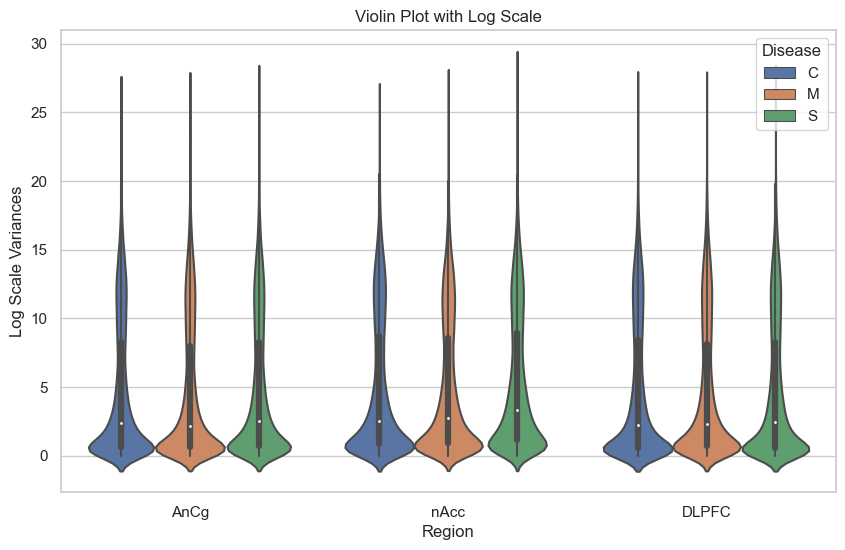

In [95]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(variances_melted, x='Region', y='LogValue', hue='Disease')# split=True)
plt.title('Violin Plot with Log Scale')
plt.ylabel('Log Scale Variances')
plt.show()

## Pathway enrichment analysis


### All genes

In [48]:
pivoted_samples

name,GSM1304870,GSM1304871,GSM1304872,GSM1304873,GSM1304874,GSM1304875,GSM1304876,GSM1304877,GSM1304878,GSM1304879,...,GSM1305047,GSM1305048,GSM1305049,GSM1305050,GSM1305051,GSM1305052,GSM1305053,GSM1305054,GSM1305055,GSM1305056
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1140.83,978.87,1074.57,1147.48,903.68,824.56,1152.50,1027.71,851.09,978.02,...,4223.55,3077.79,3229.73,3635.35,3604.07,3420.59,4102.63,2701.14,2586.70,3015.19
1053_at,63.75,74.99,72.34,71.72,73.61,68.21,63.69,48.77,69.06,71.32,...,213.87,181.82,224.74,118.16,223.98,218.83,135.41,251.16,225.75,257.30
117_at,21.04,21.78,18.78,25.40,24.52,21.32,21.41,22.44,19.28,19.58,...,96.07,111.09,94.19,175.36,96.94,93.47,100.70,80.95,104.29,185.04
121_at,189.56,178.24,144.28,192.70,172.72,197.59,211.13,190.15,249.97,198.81,...,586.32,671.01,708.31,758.99,664.14,719.59,708.69,641.29,481.93,577.66
1255_g_at,22.53,39.31,39.88,26.90,71.39,32.62,22.05,40.21,37.12,42.30,...,441.50,576.11,716.16,227.32,423.30,639.27,199.12,705.02,581.48,731.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,1258.95,1167.04,1090.42,952.27,1236.27,1127.46,877.37,1492.77,1248.26,1011.48,...,1698.97,1434.18,1427.55,1957.37,1585.77,1507.24,1479.90,1510.61,1992.42,1882.65
AFFX-r2-Ec-bioD-3_at,9953.94,9455.30,8541.84,8654.58,9534.37,9401.35,7634.24,10565.78,10297.51,8779.88,...,8663.01,8744.28,7773.25,10221.63,8556.98,8427.13,8895.69,8324.36,9703.75,9049.69
AFFX-r2-Ec-bioD-5_at,7457.31,6957.18,6138.31,6347.51,6827.19,7106.21,5529.91,7808.22,7889.92,6711.25,...,6176.37,5986.09,4957.68,7120.88,5639.75,5610.74,5900.08,5533.08,7008.07,6513.92


In [50]:
regions

['hip', 'pfc', 'str']

In [53]:
results[f'hip_schiz_control']

,Fold Change,padj,log2FoldChange
ID_REF,,,
1007_s_at,1.172997,0.176557,0.230200
1053_at,0.868717,0.061362,-0.203042
117_at,2.046662,0.291715,1.033273
121_at,1.062693,0.371542,0.087725
1255_g_at,1.042314,0.814521,0.059790
...,...,...,...
AFFX-r2-Ec-bioC-5_at,1.116665,0.314341,0.159197
AFFX-r2-Ec-bioD-3_at,1.086787,0.247687,0.120069
AFFX-r2-Ec-bioD-5_at,1.109302,0.210382,0.149652


In [55]:
DEGs = []
for r in regions:
   
    for d in ['schiz', 'MDD']:
        dataframe = results[f'{r}_{d}_control']

        dataframe['Regulation'] = 0  
        dataframe.loc[(dataframe['Fold Change'] > 1) & (dataframe['padj'] < 0.05), 'Regulation'] = 1  
        dataframe.loc[(dataframe['Fold Change'] < 1) & (dataframe['padj'] < 0.05), 'Regulation'] = -1  

        deg = dataframe[dataframe['Regulation'] != 0].index
        DEGs.extend(deg)  

    DEGs = list(set(DEGs))

In [56]:
all_genes =list(set(pivoted_samples.index))
print(f'All Genes: {len(all_genes)}')

All Genes: 54675


https://nbviewer.org/gist/newgene/6771106

In [72]:
gene_names = pd.read_excel('probe2gene-2.xlsx', header=None, names=['query', 'symbol'])

https://gseapy.readthedocs.io/en/latest/gseapy_example.html

In [73]:
all_genes = pd.DataFrame(gene_names , columns = ['query'])

In [74]:
all_genes

,query
0,1007_s_at
1,1053_at
2,117_at
3,121_at
4,1255_g_at
...,...
54670,AFFX-ThrX-5_at
54671,AFFX-ThrX-M_at
54672,AFFX-TrpnX-3_at
54673,AFFX-TrpnX-5_at


In [75]:
gene_names = gene_names.merge(pd.DataFrame(all_genes, columns = ['query']), on = 'query')

In [76]:
len(all_genes)

54675

In [77]:
gene_names.symbol.dropna()

0        DDR1/MIR4640
1                RFC2
2               HSPA6
3                PAX8
4              GUCA1A
             ...     
54630           GAPDH
54631           STAT1
54632           STAT1
54633           STAT1
54634           STAT1
Name: symbol, Length: 45782, dtype: object

In [78]:
pd.Series(gene_names.symbol.dropna()).to_csv('all_genes_affymetrix.txt', index=False, header=False)

In [79]:
gene_names

,query,symbol
0,1007_s_at,DDR1/MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
54670,AFFX-ThrX-5_at,NaN
54671,AFFX-ThrX-M_at,NaN
54672,AFFX-TrpnX-3_at,NaN
54673,AFFX-TrpnX-5_at,NaN


In [87]:
len(DEGs)

4307

In [85]:
gene_names.query('query in @DEGs').dropna().symbol

12       CYP2A6
13       SCARB1
18        MAPK1
49         RAX2
71        PDE7A
          ...  
54593    ZNF783
54627      ACTB
54629     GAPDH
54630     GAPDH
54634     STAT1
Name: symbol, Length: 3575, dtype: object

In [80]:
gene_names.query('query in @DEGs').dropna().symbol.tolist()

['CYP2A6',
 'SCARB1',
 'MAPK1',
 'RAX2',
 'PDE7A',
 'CNOT7',
 'CRYZL1',
 'C4orf33',
 'MFSD6L',
 'CDH23/LOC100653137',
 'ACVR1C',
 'VTI1A',
 'JAK1',
 'CDC42SE2',
 'CDC42SE2',
 'RFWD2',
 'ATAD3A/ATAD3B',
 'NAV3',
 'C5orf22',
 'PPP1R3B',
 'NIPA1',
 'CASC4',
 'SNHG7/SNORA17/SNORA43',
 'PCDHGA4',
 'ST7L',
 'CADM2',
 'HS6ST2',
 'SEC62',
 'C8orf31',
 'RFX4',
 'SLC26A1',
 'CLDN15',
 'SCAMP1',
 'LOC142937',
 'GPR111',
 'SYN2',
 'FLJ45513/TAC4',
 'CDK8',
 'NKD1',
 'WDR62',
 'ANKLE1',
 'TAPT1-AS1',
 'NEGR1',
 'SYN1',
 'BTNL9',
 'MACF1',
 'C17orf78',
 'RQCD1',
 'VNN3',
 'POLE4',
 'FAM27E2/FAM27E3',
 'TRIM43/TRIM43B',
 'METTL6',
 'DUSP18',
 'ZNF791',
 'ZNF791',
 'TLE6',
 'P2RY10',
 'C10orf91',
 'NTN5',
 'POM121L1P/POM121L8P/POM121L9P',
 'GPHB5',
 'TMEM237',
 'C14orf159',
 'C12orf66',
 'RQCD1',
 'SNAPC5',
 'CCSER2',
 'PPP1R21',
 'CCDC132',
 'LOC101929497',
 'FLJ25758',
 'HERC3/LOC101929134',
 'UHRF1BP1L',
 'NFS1',
 'TP73',
 'ATF3',
 'C16orf13',
 'ANKRD13C',
 'CEP70',
 'FAM188A',
 'GHITM',
 'YIF1B',


In [88]:
gene_names['symbol'] = gene_names['symbol'].astype(str)

In [90]:
# backgound only reconigized a gene list input.
enr_bg = gseapy.enrichr(gene_list = gene_names.query('query in @DEGs').dropna().symbol.tolist(),
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human',
                            'GO_Molecular_Function_2023',
                            'GO_Cellular_Component_2023',
                            'GO_Biological_Process_2023',
                             #'Disease_Signatures_from_GEO_down_2014',
                             #'Disease_Signatures_from_GEO_up_2014'
                           ],
                 # organism='human', # organism argment is ignored because we input a background
                 background="all_genes_affymetrix.txt",
                 outdir=None, # don't write to disk
                )

In [129]:
# gp.get_library_name(organism='human')

In [91]:
enr_bg.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Oxidative Phosphorylation,3.592779e-32,1.796389e-30,0,0,6.698276,484.980643,GPI;ISCA1;COX7B;SLC25A3;ALAS1;COX4I1;MRPS12;HC...
1,MSigDB_Hallmark_2020,Myc Targets V1,4.507486e-15,1.126872e-13,0,0,3.758308,124.148320,YWHAE;SLC25A3;HSP90AB1;PWP1;UBE2L3;PSMD8;SYNCR...
2,MSigDB_Hallmark_2020,mTORC1 Signaling,5.748086e-09,9.580143e-08,0,0,2.762983,52.425943,GPI;GSK3B;UBE2D3;ARPC5L;SLC2A1;PLOD2;ME1;PDK1;...
3,MSigDB_Hallmark_2020,Adipogenesis,1.598254e-08,1.997818e-07,0,0,2.690833,48.305205,SCARB1;ORM1;COX7B;MTCH2;ITSN1;GHITM;GPHN;AIFM1...
4,MSigDB_Hallmark_2020,Mitotic Spindle,8.683800e-08,8.683800e-07,0,0,2.522701,41.017149,YWHAE;TRIO;NUMA1;ITSN1;AKAP13;PPP4R2;CAPZB;ARH...
...,...,...,...,...,...,...,...,...,...
6237,GO_Biological_Process_2023,Inorganic Cation Import Across Plasma Membrane...,9.986236e-01,9.995029e-01,0,0,0.302548,0.000417,SLC9A5;KCNJ9;SLC39A6;SLC8A1
6238,GO_Biological_Process_2023,Epidermis Development (GO:0008544),9.996715e-01,9.999828e-01,0,0,0.181541,0.000060,STS;LAMA3
6239,GO_Biological_Process_2023,Extracellular Matrix Organization (GO:0030198),9.997961e-01,9.999828e-01,0,0,0.348430,0.000071,COL27A1;CCDC80;CREB3L1;PXDN;ADAM10;NOXO1;NID1;...
6240,GO_Biological_Process_2023,External Encapsulating Structure Organization ...,9.999828e-01,9.999828e-01,0,0,0.135989,0.000002,CCDC80;PXDN


Enrichment analysis identified key metabolic pathways and biological
systems such as oxidative phosphorylation, Myc pathway, mTORC1 complex and
adipogenesis, significantly involved in the development of schizophrenia and depression. These processes
are associated with mitochondrial dysfunction, impaired neuronal differentiation,
reduced neurogenesis, and inflammatory processes, emphasizing their role in the pathogenesis of these diseases.
in the pathogenesis of these diseases.

### By regions

In [93]:
DEGs_by_region = {}  # Dictionary for storing DEGs пby regions

for r in regions:
    region_DEGs = []  # list for current brain region
    for d in ['schiz', 'MDD']:
        dataframe = results[f'{r}_{d}_control']

        # Adding column 'Regulation' based on 'Fold Change' и 'padj'
        dataframe['Regulation'] = 0  # initializing it
        dataframe.loc[(dataframe['Fold Change'] > 1) & (dataframe['padj'] < 0.05), 'Regulation'] = 1  
        dataframe.loc[(dataframe['Fold Change'] < 1) & (dataframe['padj'] < 0.05), 'Regulation'] = -1  

        # Finding DEGs
        deg = dataframe[dataframe['Regulation'] != 0].index
        region_DEGs.extend(deg)  # Adding DEGs 

    DEGs_by_region[r] = list(set(region_DEGs))  # dropping duplicates with set()



In [96]:
for region, DEG_list in DEGs_by_region.items():
    gene_symbols = gene_names.query('query in @DEG_list').dropna().symbol.tolist()
    enr_bg = gseapy.enrichr(gene_list=gene_symbols,
                            gene_sets=['MSigDB_Hallmark_2020', 'KEGG_2021_Human',
                                       'GO_Molecular_Function_2023',
                                       'GO_Cellular_Component_2023',
                                       'GO_Biological_Process_2023'],
                            background="all_genes_affymetrix.txt",
                            outdir=None)  

    print(f"Enrichment results for {region}:")
    display(enr_bg.res2d)  

Enrichment results for hip:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Cellular Respiration (GO:0045333),2.284542e-18,1.038781e-14,0,0,8.295881,336.981732,COX7B;NDUFA13;NDUFB8;NDUFB7;NDUFA11;NDUFB10;ND...
1,GO_Biological_Process_2023,Aerobic Electron Transport Chain (GO:0019646),8.672931e-18,1.971791e-14,0,0,10.354447,406.788186,COX7B;NDUFB8;NDUFB7;NDUFB10;NDUFB6;UQCRB;NDUFB...
2,GO_Biological_Process_2023,Mitochondrial ATP Synthesis Coupled Electron T...,1.856418e-17,2.813711e-14,0,0,9.939784,382.933154,COX7B;NDUFB8;NDUFB7;NDUFB10;NDUFB6;UQCRB;NDUFB...
3,GO_Biological_Process_2023,Oxidative Phosphorylation (GO:0006119),1.104900e-13,1.255995e-10,0,0,10.326167,308.069342,NDUFA13;NDUFB8;NDUFB7;NDUFA11;NDUFB10;NDUFB6;U...
4,GO_Biological_Process_2023,Aerobic Respiration (GO:0009060),3.669157e-13,2.731754e-10,0,0,8.321457,238.273629,NDUFA13;NDUFB8;NDUFB7;NDUFA11;NDUFB10;NDUFB6;U...
...,...,...,...,...,...,...,...,...,...
4542,GO_Biological_Process_2023,Inorganic Cation Import Across Plasma Membrane...,9.986236e-01,9.995029e-01,0,0,0.302548,0.000417,SLC9A5;KCNJ9;SLC39A6;SLC8A1
4543,GO_Biological_Process_2023,Epidermis Development (GO:0008544),9.996715e-01,9.999828e-01,0,0,0.181541,0.000060,STS;LAMA3
4544,GO_Biological_Process_2023,Extracellular Matrix Organization (GO:0030198),9.997961e-01,9.999828e-01,0,0,0.348430,0.000071,COL27A1;CCDC80;CREB3L1;PXDN;ADAM10;NOXO1;NID1;...
4545,GO_Biological_Process_2023,External Encapsulating Structure Organization ...,9.999828e-01,9.999828e-01,0,0,0.135989,0.000002,CCDC80;PXDN


Enrichment results for pfc:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes


Enrichment results for str:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
